## LETS GROW MORE INTERNSHIP DATA SCEINCE MARCH BATCH TASK 1
## SHRUTI SHINDE
### Begineer Level TASK 1 - IRIS FLOWERS CLASSIFICATION ML PROJECT


### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data.drop(['Id'], axis=1,inplace=True)

## Basic checks 

In [17]:
data.ndim

2

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
data.shape

(150, 5)

In [21]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [24]:
data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [25]:
data.groupby('Species').var()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


In [26]:
data.groupby('Species').median()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [45]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [48]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Visualization

In [38]:
import seaborn as sns
df=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]

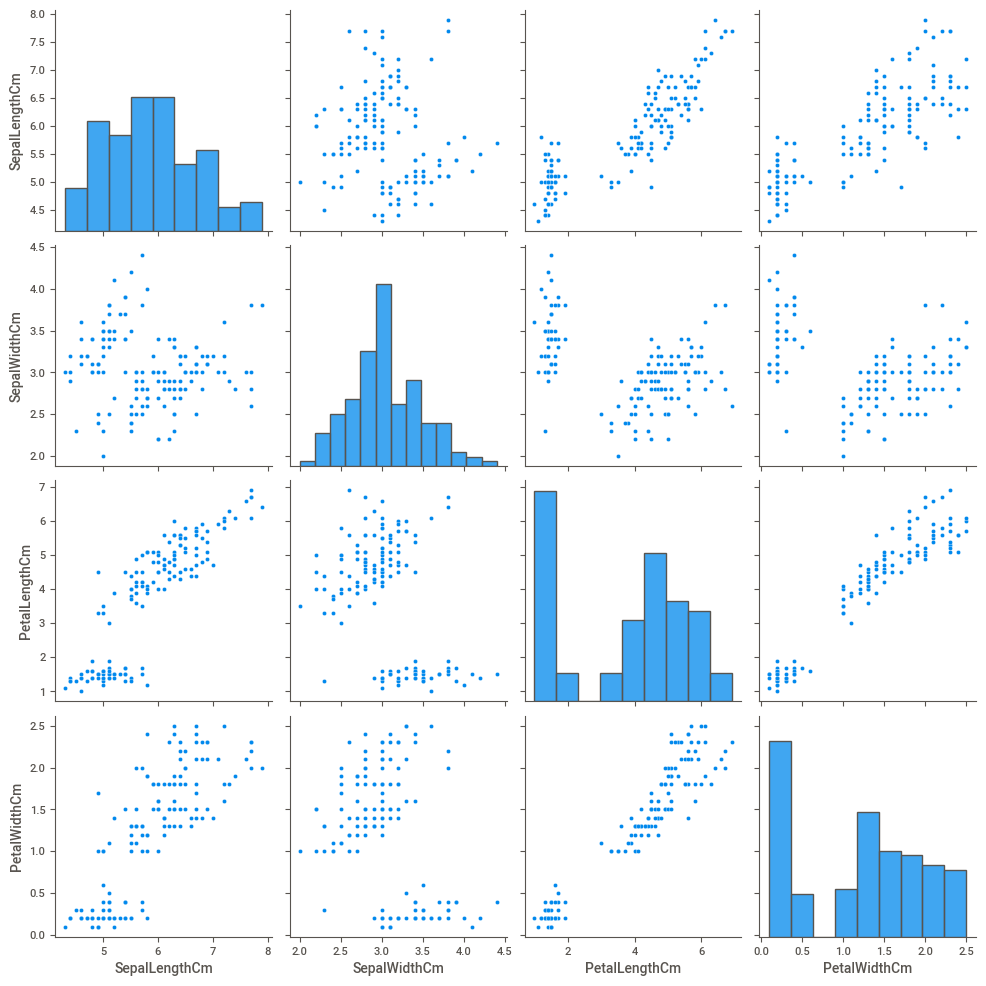

In [33]:
sns.pairplot(df)

<AxesSubplot: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

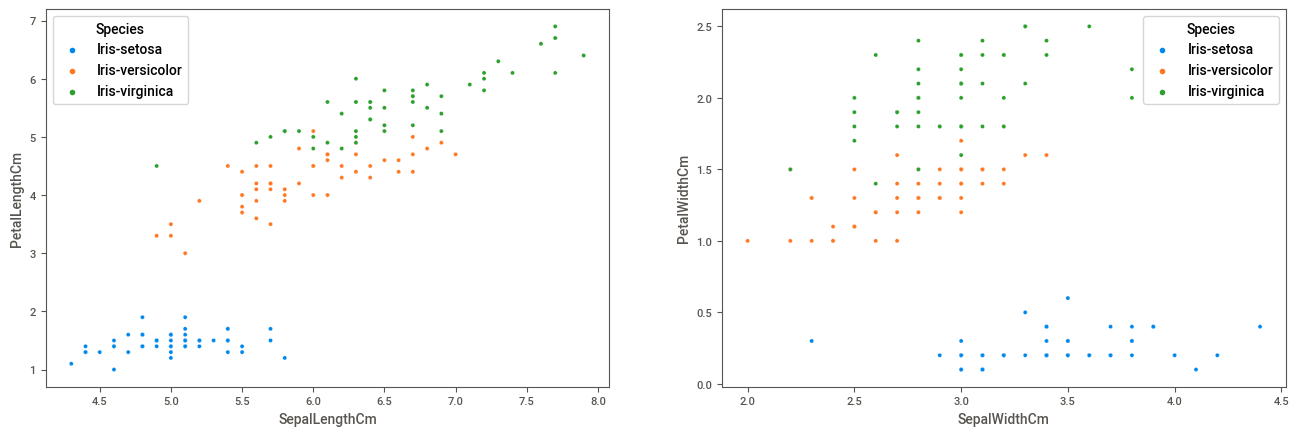

In [39]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=data,hue='Species',ax=ax1)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=data,hue='Species',ax=ax2)

<AxesSubplot: ylabel='PetalWidthCm'>

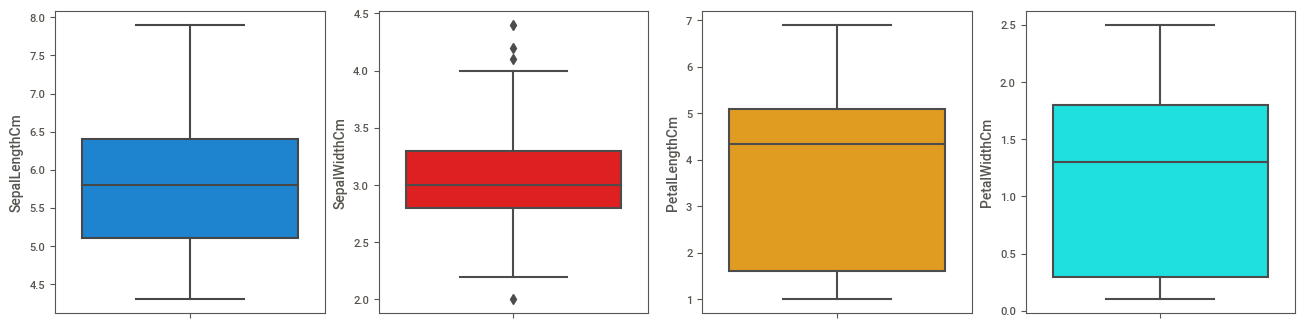

In [42]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='SepalLengthCm')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='SepalWidthCm',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='PetalLengthCm',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='PetalWidthCm',color='cyan')

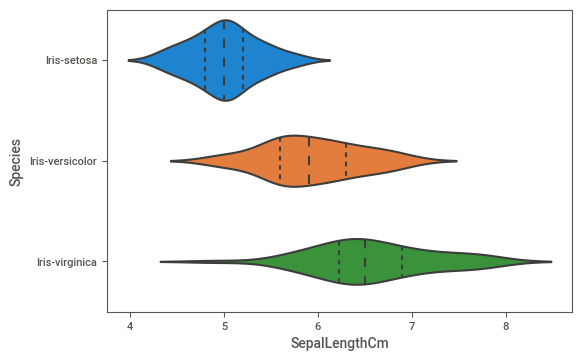

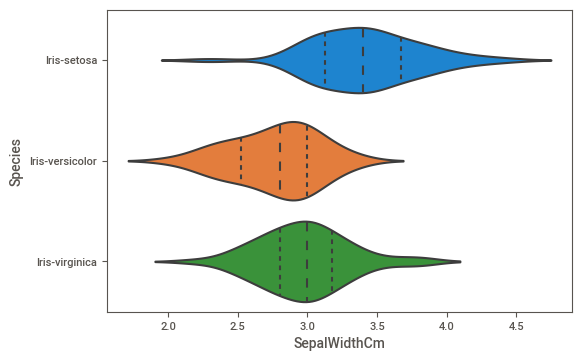

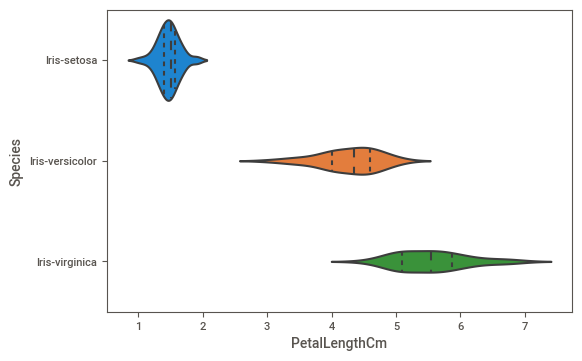

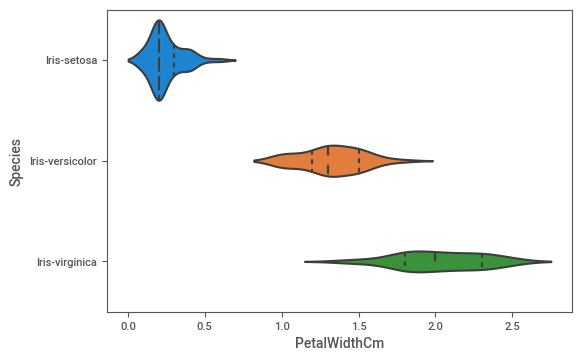

In [43]:
sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

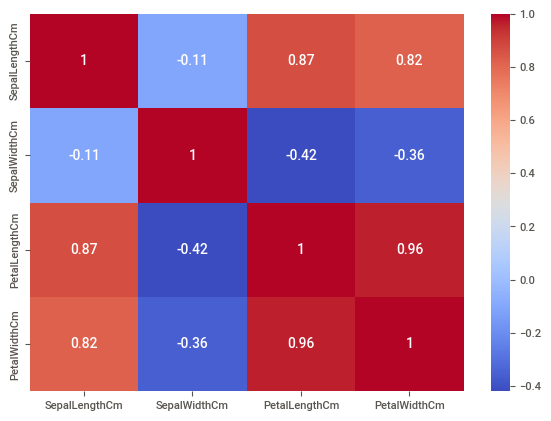

In [50]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')
plt.show()

## Model Building

In [52]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
 

le = LabelEncoder()
 

label = le.fit_transform(data['Species'])
 

label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:

data.drop("Species", axis=1, inplace=True)


data["Species"] = label


data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
X= data.iloc[:,1:-1]
X.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [58]:
from sklearn.cluster import KMeans


# Initialise the model with K as 3
model = KMeans(n_clusters=4, random_state=10)

#Training the model
model.fit(X)

KMeans(n_clusters=4, random_state=10)

In [59]:
X.shape

(150, 3)

In [60]:
## For centroids
model.cluster_centers_

array([[3.1       , 5.87096774, 2.12580645],
       [3.418     , 1.464     , 0.244     ],
       [2.6       , 3.94285714, 1.20714286],
       [2.88536585, 4.83414634, 1.65609756]])

In [61]:
# Set colours to the clusters to differentiate(Not required in main impelemntation)
color_scheme = np.array(['red','blue','green','yellow'])

In [62]:
color_scheme


array(['red', 'blue', 'green', 'yellow'], dtype='<U6')

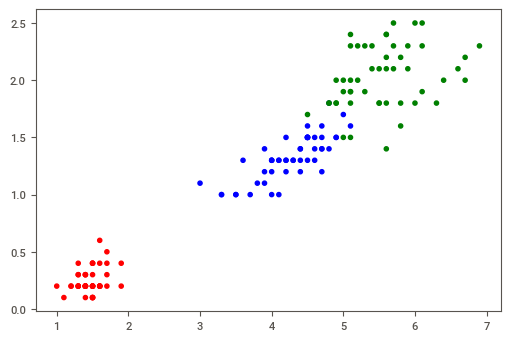

In [65]:
# Visualize the clusters in the original data(Not required in main impelemntation)
plt.scatter(data.PetalLengthCm,data.PetalWidthCm,color=color_scheme[data.Species])

In [66]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3], dtype=int32)

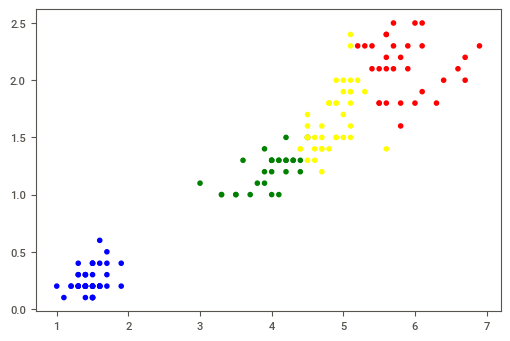

In [67]:
# visualize the clusters formed by the model(Not required in main impelemntation)
plt.scatter(X.PetalLengthCm,X.PetalWidthCm,color=color_scheme[model.labels_])

In [68]:
X['Group']= pd.DataFrame(model.labels_)
X.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Group
0,3.5,1.4,0.2,1
1,3.0,1.4,0.2,1
2,3.2,1.3,0.2,1
3,3.1,1.5,0.2,1
4,3.6,1.4,0.2,1


In [69]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [70]:
new_point=[[3.4,5.6,2.4]] # A new observation where it will go 
#means which cluster
model.predict(new_point)

array([0], dtype=int32)

In [71]:
type(new_point)

list

## Determine K using elbow method¶

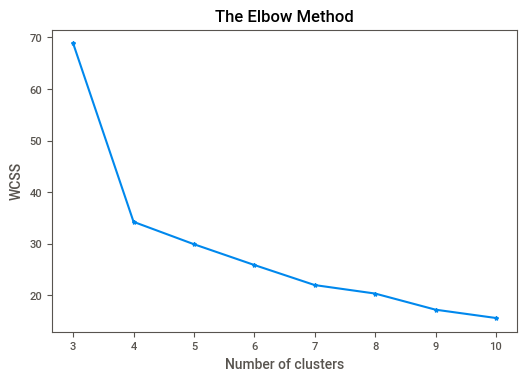

In [72]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (3,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(3,11),wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Evaluation Metrics:

In [73]:
label=model.labels_
label

from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score #K=6

0.7103026400935475